In [2]:
import sys
sys.path.insert(0, './src/')
import af2_analysis
print(af2_analysis.__file__)

/home/murail/Documents/Code/af2_analysis/./src/af2_analysis/__init__.py


In [3]:
my_data = af2_analysis.Data('./src/af2_analysis/test/inputs/fold_2024_07_01_12_14_prot_dna_zn/', verbose=False)

IntSlider(value=1, description='model:', max=5, min=1)

YO


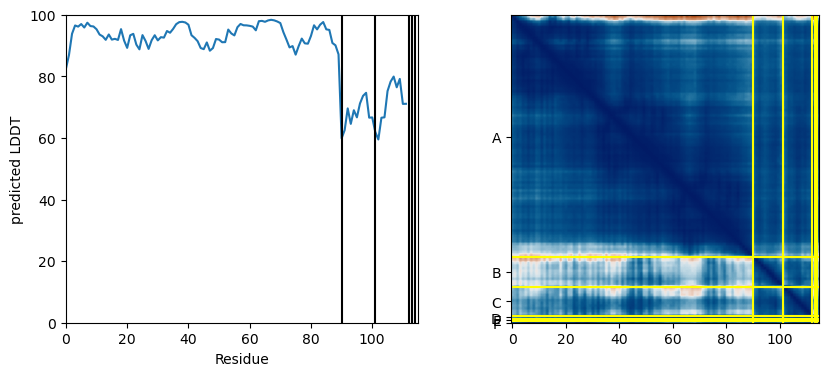

In [4]:
my_data.show_plot()

In [6]:
my_data.chain_length

{'2024_07_01_12_14_prot_dna_zn': [90, 11, 11, 1, 1, 1]}

In [9]:
from af2_analysis import analysis
analysis.pdockq(my_data, verbose=False)
my_data.df

,pdb,query,model,json,chain_iptm,chain_pair_iptm,chain_pair_pae_min,chain_ptm,fraction_disordered,has_clash,iptm,num_recycles,ptm,ranking_score,pdockq
0,./src/af2_analysis/test/inputs/fold_2024_07_01...,2024_07_01_12_14_prot_dna_zn,4,./src/af2_analysis/test/inputs/fold_2024_07_01...,"[0.81, 0.14, 0.15, 0.31, 0.31, 0.31]","[[0.73, 0.61, 0.63, 0.94, 0.93, 0.93], [0.61, ...","[[0.76, 2.69, 2.43, 0.86, 0.95, 0.96], [4.45, ...","[0.73, 0.02, 0.02, None, None, None]",0.21,0.0,0.66,10.0,0.74,0.78,0.198442
1,./src/af2_analysis/test/inputs/fold_2024_07_01...,2024_07_01_12_14_prot_dna_zn,1,./src/af2_analysis/test/inputs/fold_2024_07_01...,"[0.86, 0.17, 0.18, 0.32, 0.32, 0.32]","[[0.8, 0.69, 0.77, 0.95, 0.94, 0.94], [0.69, 0...","[[0.76, 1.99, 1.53, 0.82, 0.86, 0.88], [3.15, ...","[0.8, 0.02, 0.02, None, None, None]",0.22,0.0,0.76,10.0,0.82,0.89,0.222123
2,./src/af2_analysis/test/inputs/fold_2024_07_01...,2024_07_01_12_14_prot_dna_zn,3,./src/af2_analysis/test/inputs/fold_2024_07_01...,"[0.84, 0.16, 0.17, 0.32, 0.32, 0.32]","[[0.79, 0.66, 0.73, 0.94, 0.94, 0.93], [0.66, ...","[[0.76, 1.99, 1.68, 0.83, 0.84, 0.9], [3.16, 0...","[0.79, 0.02, 0.02, None, None, None]",0.22,0.0,0.73,10.0,0.80,0.85,0.247829
3,./src/af2_analysis/test/inputs/fold_2024_07_01...,2024_07_01_12_14_prot_dna_zn,0,./src/af2_analysis/test/inputs/fold_2024_07_01...,"[0.86, 0.18, 0.18, 0.32, 0.32, 0.31]","[[0.78, 0.74, 0.75, 0.94, 0.94, 0.93], [0.74, ...","[[0.76, 1.64, 1.65, 0.83, 0.87, 0.92], [2.6, 0...","[0.78, 0.02, 0.02, None, None, None]",0.24,0.0,0.77,10.0,0.81,0.90,0.305870
4,./src/af2_analysis/test/inputs/fold_2024_07_01...,2024_07_01_12_14_prot_dna_zn,2,./src/af2_analysis/test/inputs/fold_2024_07_01...,"[0.86, 0.18, 0.18, 0.32, 0.32, 0.32]","[[0.81, 0.73, 0.74, 0.95, 0.95, 0.94], [0.73, ...","[[0.76, 1.62, 1.76, 0.81, 0.81, 0.88], [2.33, ...","[0.81, 0.02, 0.02, None, None, None]",0.21,0.0,0.77,10.0,0.83,0.89,0.273623


In [10]:
analysis.pdockq2(my_data, verbose=False)

AssertionError: PAE array shape mismatch with CA atoms number

In [16]:
from af2_analysis import docking

#extract_pae_pep
docking.pae_pep(my_data, verbose=False)
#compute_pdockq2_lig
docking.pdockq2_lig(my_data, verbose=False)
#compute_LIS_pep
docking.LIS_pep(my_data, verbose=False)
#extract_plddt_pep
docking.plddt_pep(my_data, verbose=False)


/home/murail/miniforge3/envs/docking/lib/python3.10/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


Read all structures
Peptide chain is :B
align structures


/home/murail/miniforge3/envs/docking/lib/python3.10/site-packages/MDAnalysis/coordinates/base.py:725: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


  0%|          | 0/40 [00:00<?, ?it/s]

Extract contact residues
Contact residues : {6, 10, 12, 14, 17, 18, 19, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}
Compute distance Matrix


  0%|          | 0/40 [00:00<?, ?it/s]

Max RMSD is 24.60 A
Compute Linkage clustering
10 clusters founded for beta_amyloid_dimer_d2fa3_0


/home/murail/miniforge3/envs/docking/lib/python3.10/site-packages/MDAnalysis/analysis/diffusionmap.py:280: DeprecationWarning: The `dist_matrix` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.dist_matrix` instead.
  warnings.warn(wmsg, DeprecationWarning)


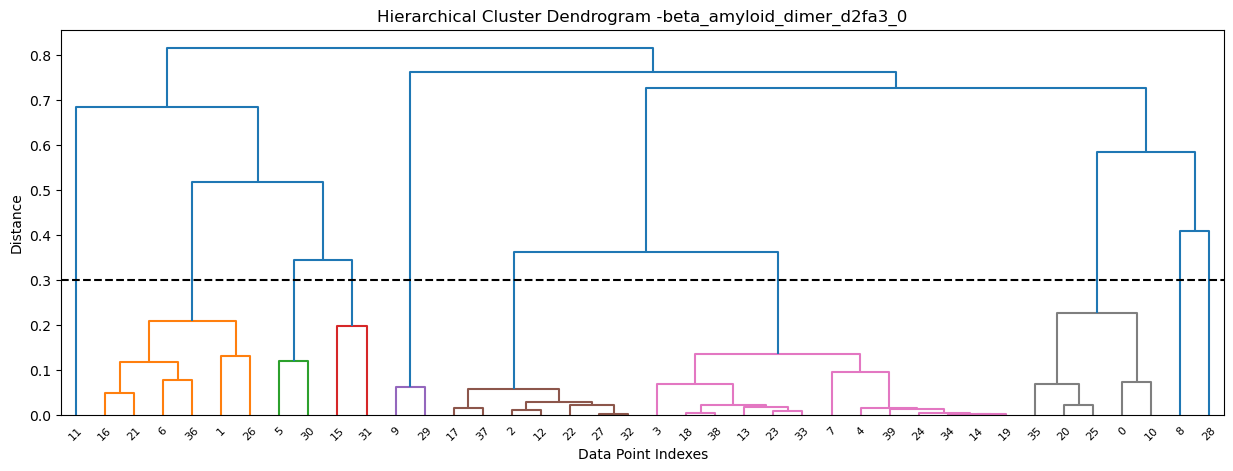

In [17]:
from af2_analysis import clustering
clustering.hierarchical(my_data.df, threshold=0.3)

In [11]:
import pickle as pkl

test_pkl = './src/af2_analysis/test/inputs/6L0V_complex_bba50_0/6L0V_complex_bba50_0_all_rank_020_alphafold2_multimer_v3_model_2_seed_003.r1.pickle'

with open(test_pkl,'rb') as f:
     x = pkl.load(f)
     print(x.keys())

dict_keys(['aligned_confidence_probs', 'distogram', 'experimentally_resolved', 'iptm', 'masked_msa', 'max_predicted_aligned_error', 'mean_plddt', 'plddt', 'predicted_aligned_error', 'predicted_lddt', 'ptm', 'ranking_confidence', 'structure_module', 'tol', 'representations'])


TypeError: Image data of dtype object cannot be converted to float

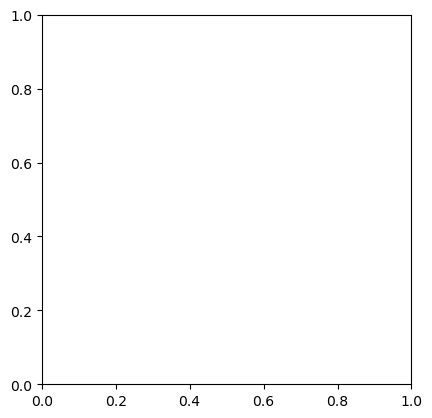

In [15]:
import matplotlib.pyplot as plt

plt.imshow(x['distogram'])